# Experiment 03: Attention U-Net with Custom Preprocessing

This notebook tests the impact of the custom preprocessing function described in the "RAovSeg" paper. We will use the same Attention U-Net architecture as the previous experiment, but we will now feed it images that have been enhanced by the specialized preprocessing logic.

### **Model Configuration**

*   **Objective**: Evaluate if custom preprocessing improves Attention U-Net performance.
*   **Model Architecture**: Attention U-Net (from `src/models.py`).
*   **Dataset**: D2_TCPW, eligible patients (`d2_manifest_t2fs_ovary_eligible.csv`).
*   **Preprocessing**: **RAovSeg custom preprocessing function applied** (from the new `UterusDatasetWithPreprocessing` class).
*   **Data Augmentation**: Simple `RandomAffine` and `RandomHorizontalFlip`.
*   **Loss Function**: `DiceBCELoss`.
*   **Optimizer**: Adam.
*   **Learning Rate**: 1e-4 (constant).
*   **Epochs**: 20.
*   **Batch Size**: 1.
*   **Image Size**: 256x256.
*   **Data Split**: 80% train / 20% validation, split by patient ID.

--- Running Preprocessing Sanity Check ---
Loading manifest from ../data/d2_manifest_t2fs_ovary_eligible.csv and creating slice map...
Slice map created. Found 278 slices containing the ovary.


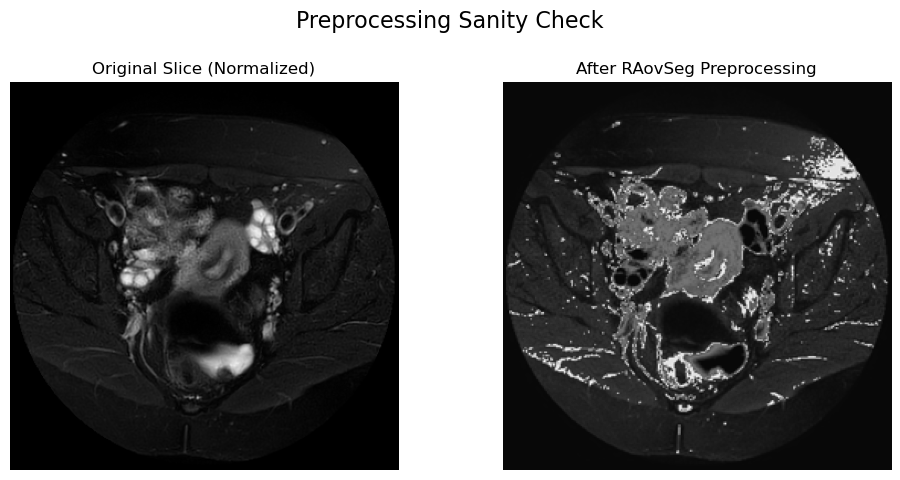

--- Sanity Check Complete ---



In [2]:
# --- Sanity Check: Visualize Preprocessing ---
import SimpleITK as sitk
import numpy as np

# We'll use the same dataset object to access its methods and manifest
# augment=False so we get a clean comparison without random flipping/rotation
print("--- Running Preprocessing Sanity Check ---")
dataset_for_viz = UterusDatasetWithPreprocessing(manifest_path=manifest_path, image_size=image_size, augment=False)

# Pick a sample slice to inspect
sample_idx = 30 # You can change this to see different slices
slice_info = dataset_for_viz.slice_map[sample_idx]
patient_data = dataset_for_viz.manifest.iloc[slice_info['patient_index']]

# --- Load the ORIGINAL slice manually ---
mri_image_original = sitk.ReadImage(patient_data['mri_path'], sitk.sitkFloat32)
mri_slice_original_np = sitk.GetArrayFromImage(mri_image_original)[slice_info['slice_index'], :, :]

# --- Get the PREPROCESSED slice using our new dataset class method ---
# The __getitem__ method will automatically call our _preprocess_raovseg function
preprocessed_tensor, _ = dataset_for_viz[sample_idx]
preprocessed_np = preprocessed_tensor.cpu().squeeze().numpy()


# --- Plot for comparison ---
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Preprocessing Sanity Check", fontsize=16)

# Plot Original (after simple min-max normalization for visualization)
min_val, max_val = mri_slice_original_np.min(), mri_slice_original_np.max()
original_normalized = (mri_slice_original_np - min_val) / (max_val - min_val) if max_val > min_val else mri_slice_original_np
axes[0].imshow(original_normalized, cmap='gray')
axes[0].set_title("Original Slice (Normalized)")
axes[0].axis('off')

# Plot Preprocessed
axes[1].imshow(preprocessed_np, cmap='gray')
axes[1].set_title("After RAovSeg Preprocessing")
axes[1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
print("--- Sanity Check Complete ---\n")

--- Loading Ovary Data with Custom Preprocessing ---
Loading manifest from ../data/d2_manifest_t2fs_ovary_eligible.csv and creating slice map...
Slice map created. Found 278 slices containing the ovary.
Loading manifest from ../data/d2_manifest_t2fs_ovary_eligible.csv and creating slice map...
Slice map created. Found 278 slices containing the ovary.
Data successfully split:
Training patients: 44, Validation patients: 12
Training slices: 214
Validation slices: 64

Using device: cuda

--- Starting Attention U-Net with Preprocessing ---


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.80it/s]


Epoch 1/20 -> Train Loss: 0.6756, Val Loss: 0.6329, Val Dice: 0.0000
  -> New best model saved at epoch 1 with Val Dice: 0.0000


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.74it/s]


Epoch 2/20 -> Train Loss: 0.6085, Val Loss: 0.5850, Val Dice: 0.0150
  -> New best model saved at epoch 2 with Val Dice: 0.0150


Validation: 100%|██████████| 64/64 [00:09<00:00,  6.58it/s]


Epoch 3/20 -> Train Loss: 0.5714, Val Loss: 0.5673, Val Dice: 0.1715
  -> New best model saved at epoch 3 with Val Dice: 0.1715


Validation: 100%|██████████| 64/64 [00:10<00:00,  6.00it/s]


Epoch 4/20 -> Train Loss: 0.5409, Val Loss: 0.5229, Val Dice: 0.2635
  -> New best model saved at epoch 4 with Val Dice: 0.2635


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.92it/s]


Epoch 5/20 -> Train Loss: 0.5123, Val Loss: 0.5348, Val Dice: 0.1439


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.87it/s]


Epoch 6/20 -> Train Loss: 0.4853, Val Loss: 0.4943, Val Dice: 0.2278


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.83it/s]


Epoch 7/20 -> Train Loss: 0.4620, Val Loss: 0.4617, Val Dice: 0.2908
  -> New best model saved at epoch 7 with Val Dice: 0.2908


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.61it/s]


Epoch 8/20 -> Train Loss: 0.4321, Val Loss: 0.5246, Val Dice: 0.1178


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.69it/s]


Epoch 9/20 -> Train Loss: 0.4158, Val Loss: 0.4702, Val Dice: 0.2079


Validation: 100%|██████████| 64/64 [00:10<00:00,  6.04it/s]


Epoch 10/20 -> Train Loss: 0.3951, Val Loss: 0.4514, Val Dice: 0.2342


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.96it/s]


Epoch 11/20 -> Train Loss: 0.3780, Val Loss: 0.4299, Val Dice: 0.2837


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.93it/s]


Epoch 12/20 -> Train Loss: 0.3638, Val Loss: 0.4942, Val Dice: 0.1986


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.95it/s]


Epoch 13/20 -> Train Loss: 0.3512, Val Loss: 0.4292, Val Dice: 0.2682


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.89it/s]


Epoch 14/20 -> Train Loss: 0.3511, Val Loss: 0.4694, Val Dice: 0.1998


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.94it/s]


Epoch 15/20 -> Train Loss: 0.3305, Val Loss: 0.4246, Val Dice: 0.2604


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.85it/s]


Epoch 16/20 -> Train Loss: 0.3234, Val Loss: 0.4516, Val Dice: 0.2072


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.92it/s]


Epoch 17/20 -> Train Loss: 0.3119, Val Loss: 0.4177, Val Dice: 0.2711


Validation: 100%|██████████| 64/64 [00:10<00:00,  5.85it/s]


Epoch 18/20 -> Train Loss: 0.3151, Val Loss: 0.4207, Val Dice: 0.2697


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.79it/s]


Epoch 19/20 -> Train Loss: 0.3140, Val Loss: 0.4394, Val Dice: 0.2210


Validation: 100%|██████████| 64/64 [00:11<00:00,  5.82it/s]


Epoch 20/20 -> Train Loss: 0.3066, Val Loss: 0.3968, Val Dice: 0.3104
  -> New best model saved at epoch 20 with Val Dice: 0.3104
--- Finished Training ---
Best model was from epoch 20 with a validation Dice score of 0.3104
Model saved to ../models/11_attention_unet_preprocessed_best.pth



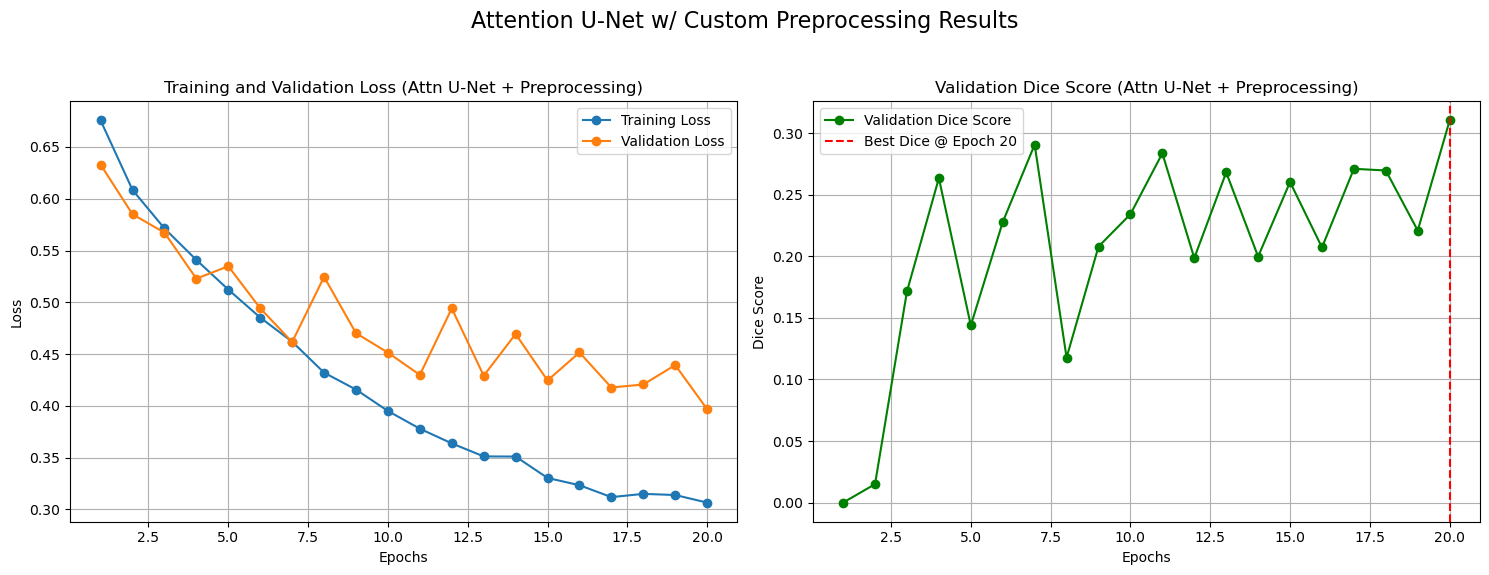

In [1]:
# --- Imports and Setup ---
import os
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset
from torch.optim import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

# Add project root to path
project_root = os.path.abspath('..')
if project_root not in sys.path:
    sys.path.append(project_root)

# <--- CHANGE: Import our new Dataset class ---
from src.data_loader import UterusDatasetWithPreprocessing 
from src.models import AttentionUNet

# --- Configuration ---
manifest_path = '../data/d2_manifest_t2fs_ovary_eligible.csv'
image_size = 256
batch_size = 1
num_epochs = 20
lr = 1e-4

# --- Data Loading ---
print("--- Loading Ovary Data with Custom Preprocessing ---")
# <--- CHANGE: Use the new Dataset class ---
train_full_dataset = UterusDatasetWithPreprocessing(manifest_path=manifest_path, image_size=image_size, augment=True)
val_full_dataset = UterusDatasetWithPreprocessing(manifest_path=manifest_path, image_size=image_size, augment=False)

# Data splitting logic remains the same
patient_ids = train_full_dataset.manifest['patient_id'].unique()
split_idx = int(len(patient_ids) * 0.8)
train_ids, val_ids = patient_ids[:split_idx], patient_ids[split_idx:]
train_indices = [i for i, sm in enumerate(train_full_dataset.slice_map) if train_full_dataset.manifest.loc[sm['patient_index'], 'patient_id'] in train_ids]
val_indices = [i for i, sm in enumerate(val_full_dataset.slice_map) if val_full_dataset.manifest.loc[sm['patient_index'], 'patient_id'] in val_ids]
train_dataset = Subset(train_full_dataset, train_indices)
val_dataset = Subset(val_full_dataset, val_indices)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
print(f"Data successfully split:\nTraining patients: {len(train_ids)}, Validation patients: {len(val_ids)}\nTraining slices: {len(train_dataset)}\nValidation slices: {len(val_dataset)}")


# --- Metrics, Loss, and Training Functions (Identical to previous notebooks) ---
def dice_score(preds, targets, epsilon=1e-6):
    preds_flat = preds.view(-1)
    targets_flat = targets.view(-1)
    intersection = (preds_flat * targets_flat).sum()
    return (2. * intersection + epsilon) / (preds_flat.sum() + targets_flat.sum() + epsilon)

class DiceBCELoss(nn.Module):
    def __init__(self, weight=0.5):
        super(DiceBCELoss, self).__init__()
        self.weight = weight
    def forward(self, inputs, targets, smooth=1):
        inputs = torch.sigmoid(inputs)
        inputs_flat = inputs.view(-1)
        targets_flat = targets.view(-1)
        bce = F.binary_cross_entropy(inputs_flat, targets_flat, reduction='mean')
        intersection = (inputs_flat * targets_flat).sum()
        dice_loss = 1 - (2.*intersection + smooth)/(inputs_flat.sum() + targets_flat.sum() + smooth)
        return bce * self.weight + dice_loss * (1 - self.weight)

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for images, masks in tqdm(loader, desc="Training"):
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    return running_loss / len(loader.dataset)

def validate(model, loader, criterion, device):
    model.eval()
    running_loss = 0.0
    running_dice = 0.0
    with torch.no_grad():
        for images, masks in tqdm(loader, desc="Validation"):
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            preds = torch.sigmoid(outputs) > 0.5
            dice = dice_score(preds, masks)
            running_loss += loss.item() * images.size(0)
            running_dice += dice.item() * images.size(0)
    return running_loss / len(loader.dataset), running_dice / len(loader.dataset)


# --- Main Training Loop ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"\nUsing device: {device}")

model = AttentionUNet(n_channels=1, n_classes=1).to(device)
optimizer = Adam(model.parameters(), lr=lr)
criterion = DiceBCELoss()

train_loss_history, val_loss_history, val_dice_history = [], [], []

best_val_dice = -1.0
best_epoch = -1
# <--- CHANGE: New model save path ---
model_save_path = "../models/11_attention_unet_preprocessed_best.pth"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

print("\n--- Starting Attention U-Net with Preprocessing ---")
for epoch in range(num_epochs):
    train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
    val_loss, val_dice = validate(model, val_loader, criterion, device)
    train_loss_history.append(train_loss)
    val_loss_history.append(val_loss)
    val_dice_history.append(val_dice)
    
    print(f"Epoch {epoch+1}/{num_epochs} -> Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Dice: {val_dice:.4f}")

    if val_dice > best_val_dice:
        best_val_dice = val_dice
        best_epoch = epoch + 1
        torch.save(model.state_dict(), model_save_path)
        print(f"  -> New best model saved at epoch {best_epoch} with Val Dice: {best_val_dice:.4f}")

print("--- Finished Training ---")
print(f"Best model was from epoch {best_epoch} with a validation Dice score of {best_val_dice:.4f}")
print(f"Model saved to {model_save_path}\n")

# --- Visualization ---
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history, label='Training Loss', marker='o')
plt.plot(range(1, num_epochs + 1), val_loss_history, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss (Attn U-Net + Preprocessing)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_dice_history, label='Validation Dice Score', color='green', marker='o')
plt.title('Validation Dice Score (Attn U-Net + Preprocessing)')
plt.xlabel('Epochs')
plt.ylabel('Dice Score')
plt.axvline(x=best_epoch, color='r', linestyle='--', label=f'Best Dice @ Epoch {best_epoch}')
plt.legend()
plt.grid(True)

plt.suptitle('Attention U-Net w/ Custom Preprocessing Results', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()